# Teste 3 - Incertezas

Responda às questões abaixo.

Não crie novas células nem apague células existentes. Apenas responda nas células indicadas.

Escreva o texto em Markdown e LaTeX, conforme instruções em [Jupyter - Markdown cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), e escreva os códigos em [Julia](https://julialang.org).

Apenas os pacotes indicados na célula abaixo podem ser utilizados para responder às questões cujas respostas requerem códigos.

In [6]:
using LsqFit
using Plots
using Random
import Distributions: mean, var, quantile, MvNormal

## Questão 1

Considere um conjunto de apenas dois dados $(x_i, y_i) \in \mathbb{R}^2$, $i = 1, 2$, para o qual buscamos ajustar um modelo linear com parâmetros reais $\boldsymbol\beta = (\beta_0, \beta_1)$:

$$ y = \beta_0  + \beta_1 x.
$$

Assumindo que as incertezas $\epsilon_i$, $i=1, 2$, nas medições de $y \sim y_i + \epsilon_i$ são independentes entre si e dadas por uma normal com média zero e mesmo desvio-padrão $\sigma$, responda às seguintes perguntas, em cada uma das células abaixo:

i) Escreva a matrix de variância-covariância $\operatorname{Cov}(\boldsymbol\beta)$ explicitamente em função de $x_1$, $x_2$ e $\sigma$;

ii) Mostre que a variância (que é o vetor $\mathrm{Var}(\boldsymbol\beta) = \mathrm{diag}(\mathrm{Cov}(\boldsymbol\beta))$) diverge quando $x_2 - x_1 \rightarrow 0$ (i.e. a norma Euclidiana de $\mathrm{Var}(\boldsymbol\beta)$ tende a $+\infty$), significando que a incerteza aumenta indefinidamente.

----
Como $y \sim y_i + \epsilon_i$, reescrevemos o modelo por
$$
y_i = \beta_0 + \beta_1 x_i - \epsilon_i
$$
que, matricialmente, é representado pela equação
$$
\mathrm{y} = \mathrm{X}\boldsymbol{\beta} - \boldsymbol\epsilon
$$
com $\mathrm{y} = [y_j] \in \mathbb{M}_{j \times 1}$, $\boldsymbol\epsilon = [\epsilon_j]\in \mathbb{M}_{j \times 1}$ e $\mathrm X$ sendo matriz de Vandermonde.
Sabemos que, sob essas hipóteses, $\operatorname{Cov}(\boldsymbol\beta) = \sigma^2 (\mathrm{X}^T \mathrm{X})^{-1}$. Assim, temos:
$$
\mathrm{X}^T \mathrm{X} = \begin{bmatrix} 2 & x_1 + x_2 \\ x_1 + x_2 & x_1^2 + x_2^2 \end{bmatrix}
$$
cuja inversa (fiz no SymPy) é:
$$
(\mathrm{X}^T \mathrm{X})^{-1} = \frac{1}{(x_1 - x_2)^2}\begin{bmatrix} x_1^2 + x_2^2 & -(x_1 + x_2) \\ -(x_1 + x_2) & 2 \end{bmatrix}
$$
logo 
$$
\operatorname{Cov}(\boldsymbol\beta) =  \frac{\sigma^2}{(x_1 - x_2)^2}\begin{bmatrix} x_1^2 + x_2^2 & -(x_1 + x_2) \\ -(x_1 + x_2) & 2 \end{bmatrix}
$$

----

Com a expressão acima encontrada pra $\operatorname{Cov}(\boldsymbol\beta)$ escrevemos $\operatorname{Var}(\boldsymbol\beta) = \frac{\sigma^2}{(x_1 - x_2)^2} ( x_1^2 + x_2^2, 2) = \alpha \mathbf{v}$, cuja norma tem forma $\| \alpha \mathrm{v} \| = \sqrt{\alpha^2 (\mathrm{v} \cdot \mathrm{v})} = \alpha\sqrt{ (\mathrm{v} \cdot \mathrm{v})}$. Isso dá
$$
\alpha\sqrt{ (x_1^2 + x_2^2)^2 + 2(2(x_1^2 + x_2^2)) + 2^2}
$$
que, quando $|x_1 - x_2| \rightarrow 0$, dá
$$
\alpha\sqrt{ (2 x_1^2)^2 + 2(2(2 x_1^2)) + 2^2} = 2\alpha\sqrt{ x_1^4 + 2 x_1^2 + 1}
$$
que é constante, enquanto o denominador de $\alpha$ vai a zero. Logo
$$\begin{align*}
&\lim_{|x_1 - x_2| \rightarrow 0} \frac{2 \sigma^2}{(x_1 - x_2)^2}\sqrt{ (x_1^2 + x_2^2)^2 + 2(2(x_1^2 + x_2^2)) + 2^2} = \\
= \Big(&\lim_{|x_1 - x_2| \rightarrow 0} \frac{2 \sigma^2}{(x_1 - x_2)^2}\Big)\cdot \Big(\lim_{|x_1 - x_2| \rightarrow 0} \sqrt{ (x_1^2 + x_2^2)^2 + 2(2(x_1^2 + x_2^2)) + 2^2}\Big) \\
=\Big(&\lim_{|x_1 - x_2| \rightarrow 0} \frac{2 \sigma^2}{(x_1 - x_2)^2}\Big)\cdot\sqrt{ x_1^4 + 2 x_1^2 + 1} = +\infty
\end{align*}$$

----

## Questão 2

Considerando o conteúdo do caderno "6.1 - Qualidade do ajuste", mostre a relação $\mathrm{SS}_{\mathrm{reg}}= \mathrm{SS}_{\mathrm{tot}} − \mathrm{SS}_{\mathrm{res}}$ sob as condições mencionadas no texto, i.e:

1. O modelo $f_{\boldsymbol \beta} =f_{\boldsymbol \beta}(x)$ é linear nos parâmetros $\boldsymbol\beta$;

1. A média $\bar y$ pode ser descrita pelo modelo com uma escolha apropriada $\bar{\boldsymbol \beta}$ dos parâmetros, com $\bar y = f_{\bar{\boldsymbol β}}(x)$, independente de x; e

1. O ajuste é feito minimizando-se o erro quadrático dos resíduos.

YOUR ANSWER HERE

## Questão 3

Em uma epidemia de influenza, em um internato no Reino Unido, foram registrados os seguintes números de casos, ao longo de quase duas semanas

| Dia | Infectados |
|:---:|: --- :|
| 1 | 1 |
| 2 | 3 |
| 3 | 7 |
| 4 | 25 |
| 5 | 72 |
| 6 | 222 |
| 7 | 282 |
| 8 | 256 |
| 9 | 233 |
| 10 | 189 |
| 11 | 123 |
| 12 | 70 |
| 13 | 25 |
| 14 | 11 |
| 15 | 4 |

Considere um modelo da forma
$$
f_\beta(x) = \beta_1 e^{-\displaystyle\frac{(x - \beta_2)^2}{\beta_3}}.
$$

Nas células seguintes, faça

i) Um ajuste do modelo aos dados, via `LsqFit.jl`, encontrando os devidos parâmetros $\beta = (\beta_1, \beta_2, \beta_3)$ que minimizam a soma dos quadrados dos resíduos do modelo em relação aos dados;

ii) Uma simulação de Monte Carlo, com 400 amostras retiradas de uma distribuição normal multivariada obtida a partir da matriz de covariância das incertezas nos parâmetros (assumindo erros normais independentes e identicamente distribuídos, como fizemos em aula). Exiba um gráfico com os dados e os resultados das diversas simulações;

iii) Utilizando o resultado das simulações de Monte-Carlo, faça um gráfico exibindo os dados e o intervalo de confiança de 95%.

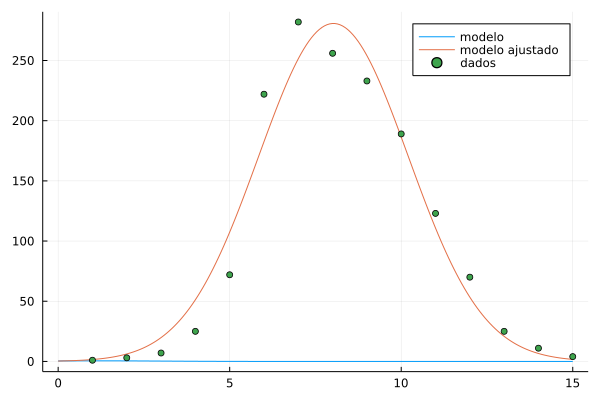

In [32]:
# ESCREVA A SUA RESPOSTA PARA O ITEM i) DA QUESTÃO 3 NESTA CÉLULA
    
amostra_dias = collect(1:15)
amostra_infectados = [1, 3, 7, 25, 72, 222, 282, 256, 233, 189, 123, 70, 25, 11, 4]

t = range(0.0, 15.0, length = 200)

# Defina o modelo `model(d, β)`, faça o ajuste e trace o resultado

# YOUR CODE HERE

β₀ = [0.5, 1.2, 2*π]

function model(d, β)

    b1 = β[1]
    b2 = β[2]
    b3 = β[3]
    f = b1 .*  exp.(-(((d .- b2) .^ 2) ./ b3 ))
    return f
end

fit = curve_fit(model, amostra_dias, amostra_infectados, β₀)
β_fit = fit.param
# println(β_fit)
plot(t, model(t, β₀), label = "modelo")
plot!(t, model(t, β_fit), label = "modelo ajustado")
scatter!(amostra_dias, amostra_infectados, label = "dados")



In [ ]:
# ESCREVA A SUA RESPOSTA PARA O ITEM ii) DA QUESTÃO 3 NESTA CÉLULA

num_amostras = 400
simulations = fill(0.0, length(t), num_amostras)

# Faça as simulações e exiba o resultado

# YOUR CODE HERE

In [ ]:
# ESCREVA A SUA RESPOSTA PARA O ITEM iii) DA QUESTÃO 3 NESTA CÉLULA

# YOUR CODE HERE